In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('./GDH2016_Daten_xlsx.csv', sep=';', index_col=0)
data.rename(columns={'Regional-\nschlüssel': 'Regionalschluessel',
                     'Gemeinde-\nschlüsselnr.': 'Gemeindeschluesselnr',
                     'Vgem-\nschlüssel': 'Vgemschluessel'}, inplace=True)

In [3]:
# Prepare data
data_gemeinden = data.loc[~pd.isna(data.Gemeindeschluesselnr)] # Alles andere sind Zusammenfassungen, Verwaltungsgemeinschaften, etc.
data_gemeinden_summaries = data.loc[pd.isna(data.Gemeindeschluesselnr)]

In [4]:
# Retrieve summary information
data_gemeinden_summaries.loc[data_gemeinden_summaries.Bezeichnung == 'Bayern', 'Spalte014']

Laufende\nNummer
1    12843514
Name: Spalte014, dtype: int64

In [5]:
regierungsbezirke_schluessel = {'Oberbayern': '91',
                               'Niederbayern': '92',
                               'Oberpfalz': '93',
                               'Oberfranken': '94',
                               'Mittelfranken': '95',
                               'Unterfranken': '96',
                               'Schwaben': '97'}

In [6]:
# Filter data by Regierungsbezirk
def data_by_regierungsbezirk(regierungsbezirk):
    return(data_gemeinden.loc[data_gemeinden.Regionalschluessel.str[:2] == regierungsbezirke_schluessel[regierungsbezirk]])

In [7]:
# Search Regionalschlüssel by Gemeindename
search_term = 'Übersee'
data_gemeinden.loc[data_gemeinden.Bezeichnung == search_term, 'Regionalschluessel'].tolist()[0]

'9189159'

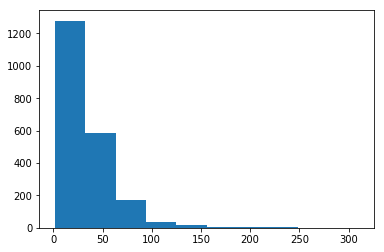

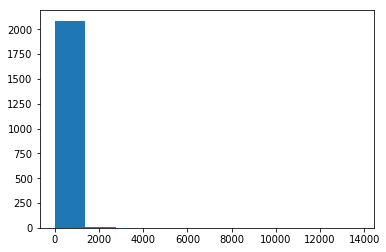

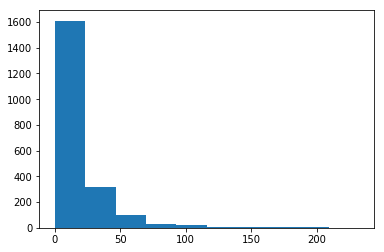

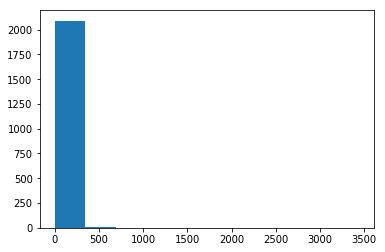

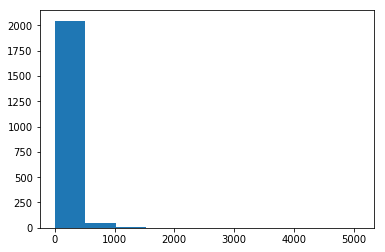

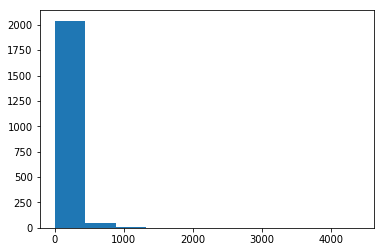

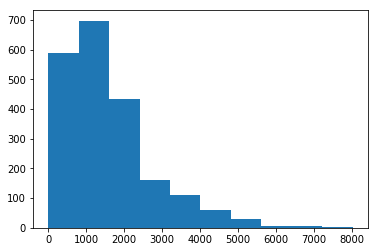

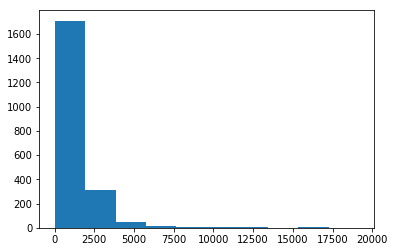

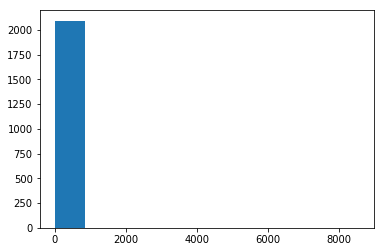

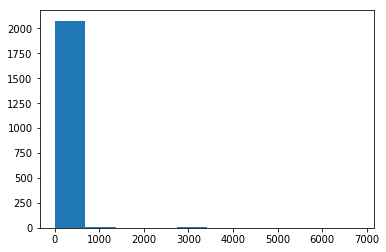

In [10]:
# Plots
for spalte_nr in np.arange(10)+1:
        column_name = "Spalte"+"{:03}".format(spalte_nr)
        spalte_data = data_gemeinden.loc[:, column_name].tolist()
        
        fig = plt.figure()
        plt.hist(spalte_data)
        plt.plot()